In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
# Set a random seed for reproducibility
np.random.seed(42)

In [2]:
# Generate synthetic data
num_customers = 1000

In [3]:
# Generate customer IDs
customer_ids = np.arange(1, num_customers + 1)

In [4]:
# Generate customer activities (time spent on different sections of the website)
activities = ['Home', 'Products', 'Blog', 'About', 'Contact']
num_activities = len(activities)
customer_activities = np.random.randint(low=1, high=60, size=(num_customers, num_activities))

In [5]:
# Generate visit frequencies
visit_frequencies = np.random.randint(low=1, high=50, size=num_customers)

In [6]:
# Generate advertisement categories
advertisement_categories = ['Sport-based', 'Cinematic', 'Artistic', 'Technology', 'Fashion']
num_categories = len(advertisement_categories)
customer_categories = np.random.choice(advertisement_categories, size=num_customers)


In [7]:
# Create the dataset
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'Home': customer_activities[:, 0],
    'Products': customer_activities[:, 1],
    'Blog': customer_activities[:, 2],
    'About': customer_activities[:, 3],
    'Contact': customer_activities[:, 4],
    'VisitFrequency': visit_frequencies,
    'Category': customer_categories
})

In [8]:
# Save the dataset to a CSV file
data.to_csv('customer_data.csv', index=False)

In [9]:
# Step 1: Importing the dataset
data = pd.read_csv('customer_data.csv')

In [10]:
data

,CustomerID,Home,Products,Blog,About,Contact,VisitFrequency,Category
0,1,39,52,29,15,43,4,Fashion
1,2,8,21,39,58,19,40,Technology
2,3,23,11,11,24,53,3,Cinematic
3,4,36,40,24,3,22,29,Sport-based
4,5,53,2,24,44,30,41,Artistic
...,...,...,...,...,...,...,...,...
995,996,7,52,57,12,16,6,Technology
996,997,16,43,53,36,13,21,Sport-based
997,998,7,36,47,51,9,32,Cinematic
998,999,32,11,8,33,23,35,Technology


In [11]:
# Step 2: Pre-processing the data
# Check for missing values
missing_values = data.isnull().sum()
print('Missing Values:')
print(missing_values)

Missing Values:
CustomerID        0
Home              0
Products          0
Blog              0
About             0
Contact           0
VisitFrequency    0
Category          0
dtype: int64


In [12]:
# Check data types
data_types = data.dtypes
print('\nData Types:')
print(data_types)


Data Types:
CustomerID         int64
Home               int64
Products           int64
Blog               int64
About              int64
Contact            int64
VisitFrequency     int64
Category          object
dtype: object


In [13]:
# Step 3: Exploratory Data Analysis (EDA)
# Summary statistics
summary_stats = data.describe()
print('\nSummary Statistics:')
print(summary_stats)


Summary Statistics:
        CustomerID         Home     Products         Blog        About  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    30.532000    28.821000    29.972000    30.689000   
std     288.819436    17.209915    16.770039    16.236096    17.187952   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
25%     250.750000    16.000000    14.000000    17.000000    15.000000   
50%     500.500000    31.000000    28.000000    30.000000    32.000000   
75%     750.250000    46.000000    44.000000    43.250000    45.000000   
max    1000.000000    59.000000    59.000000    59.000000    59.000000   

           Contact  VisitFrequency  
count  1000.000000     1000.000000  
mean     30.615000       25.154000  
std      17.088323       14.381346  
min       1.000000        1.000000  
25%      16.000000       13.000000  
50%      31.000000       25.500000  
75%      46.000000       38.000000  
max      59.0000

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


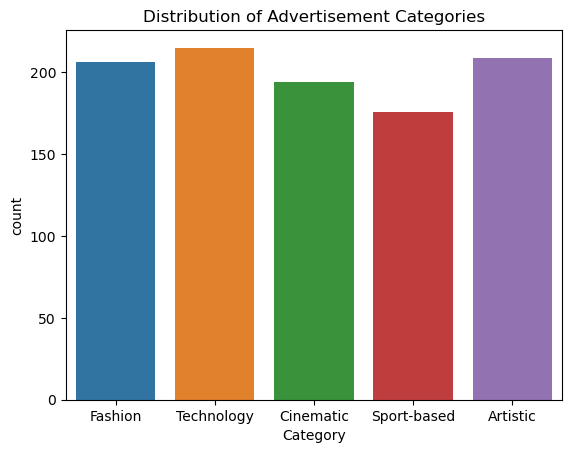

In [14]:
# Distribution of the target variable
sns.countplot(data['Category'])
plt.title('Distribution of Advertisement Categories')
plt.show()

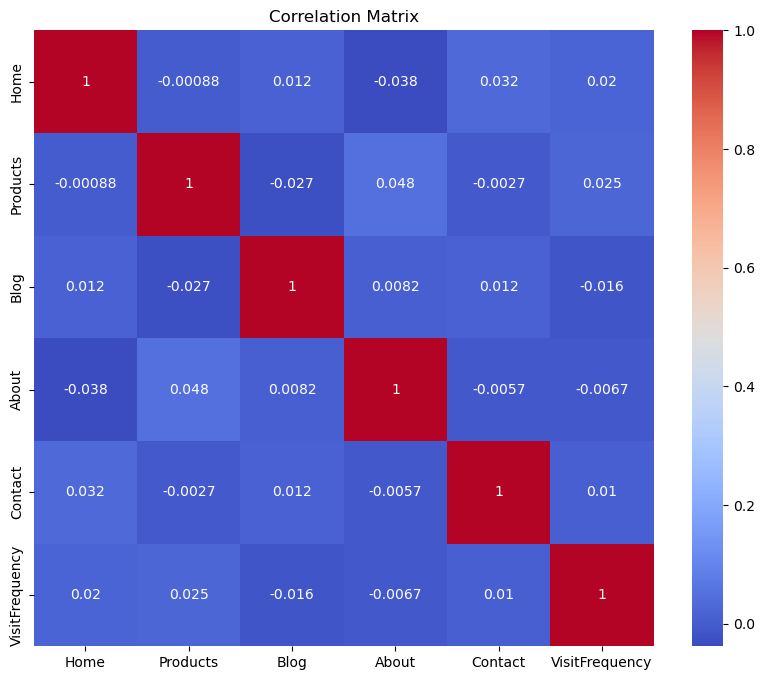

In [15]:
# Correlation matrix
correlation_matrix = data.drop('CustomerID', axis=1).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [16]:
# Step 4: Statistical Analysis
# Perform t-test for a specific feature (e.g., Home vs. Products)
feature1 = data[data['Category'] == 'Sport-based']['Home']
feature2 = data[data['Category'] == 'Sport-based']['Products']
t_stat, p_value = stats.ttest_ind(feature1, feature2)
print('\nT-test Results:')
print('t-statistic:', t_stat)
print('p-value:', p_value)


T-test Results:
t-statistic: 1.6481839294931617
p-value: 0.10021227176690972


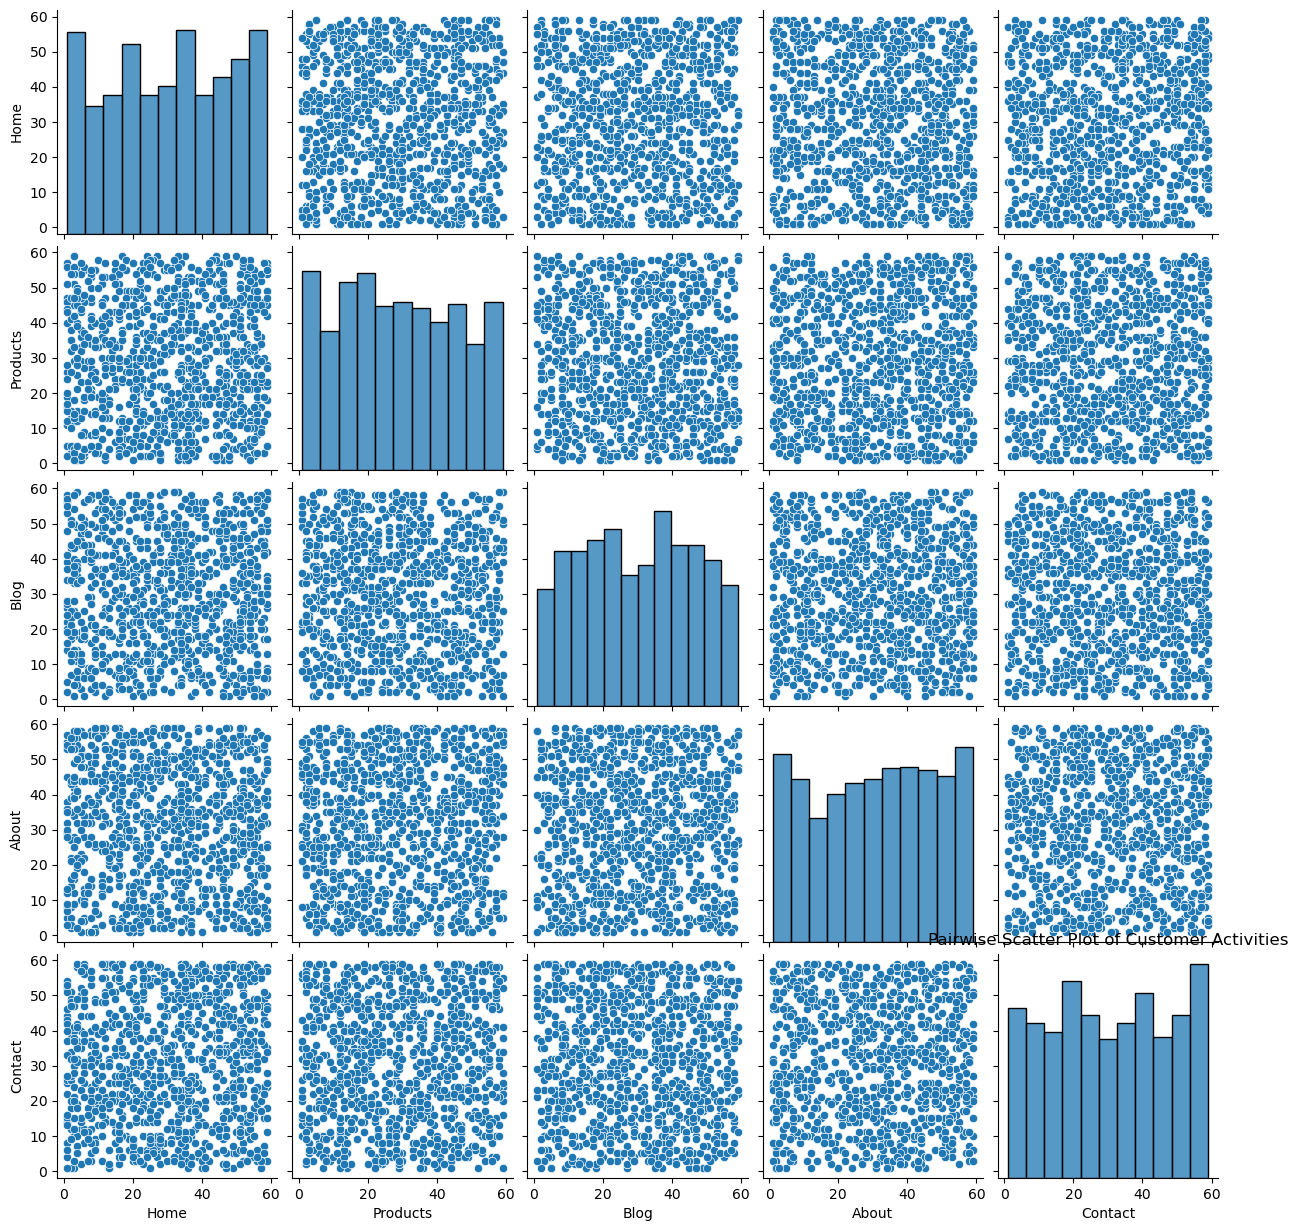

In [17]:
# Pairwise Scatter Plot of Customer Activitiessns.countplot(data['Category'])
sns.pairplot(data[['Home', 'Products', 'Blog', 'About', 'Contact']])
plt.title('Pairwise Scatter Plot of Customer Activities')
plt.show()


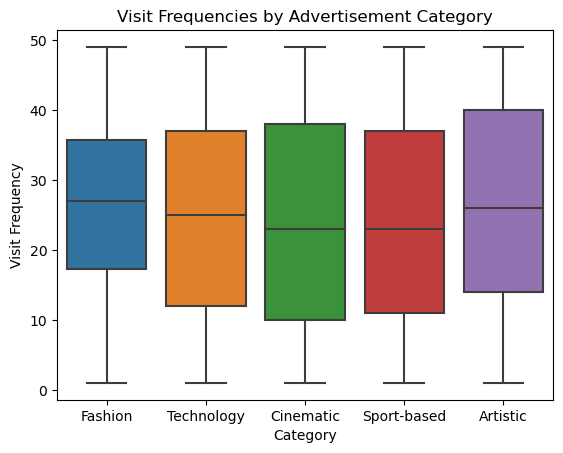

In [18]:
# Box Plot of Visit Frequencies by Advertisement Category
sns.boxplot(x='Category', y='VisitFrequency', data=data)
plt.title('Visit Frequencies by Advertisement Category')
plt.xlabel('Category')
plt.ylabel('Visit Frequency')
plt.show()



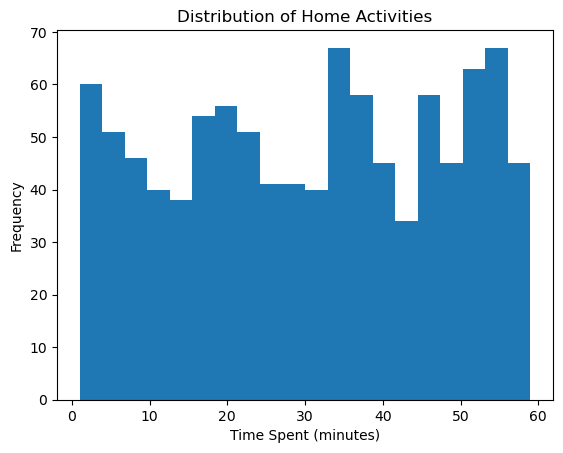

In [19]:
# Histogram of Home Activities
plt.hist(data['Home'], bins=20)
plt.title('Distribution of Home Activities')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Frequency')
plt.show()


In [20]:
import pandas as pd
from scipy.stats import f_oneway

# Step 1: Importing the dataset
data = pd.read_csv('customer_data.csv')

# Step 2: Statistical Analysis - ANOVA
# Perform ANOVA on the 'VisitFrequency' feature across different categories
categories = data['Category'].unique()
category_data = [data[data['Category'] == category]['VisitFrequency'] for category in categories]

# Perform the ANOVA test
f_stat, p_value = f_oneway(*category_data)

# Print the ANOVA results
print('ANOVA Results:')
print('F-statistic:', f_stat)
print('p-value:', p_value)


ANOVA Results:
F-statistic: 1.2052808152614456
p-value: 0.3068864688238199


In [21]:
# Step 3: Specifying the problem scope
X = data.drop(['CustomerID', 'Category'], axis=1)
y = data['Category']

In [25]:
# Step 4: Label Encoding the categorical column
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [26]:
# Step 5: Choosing the most appropriate algorithm
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [27]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier()

In [28]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Step 6: Evaluating the model
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [30]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Evaluation Metrics:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Evaluation Metrics:
Accuracy: 0.24
Precision: 0.24282102400523453
Recall: 0.24
F1-Score: 0.23895042197883243


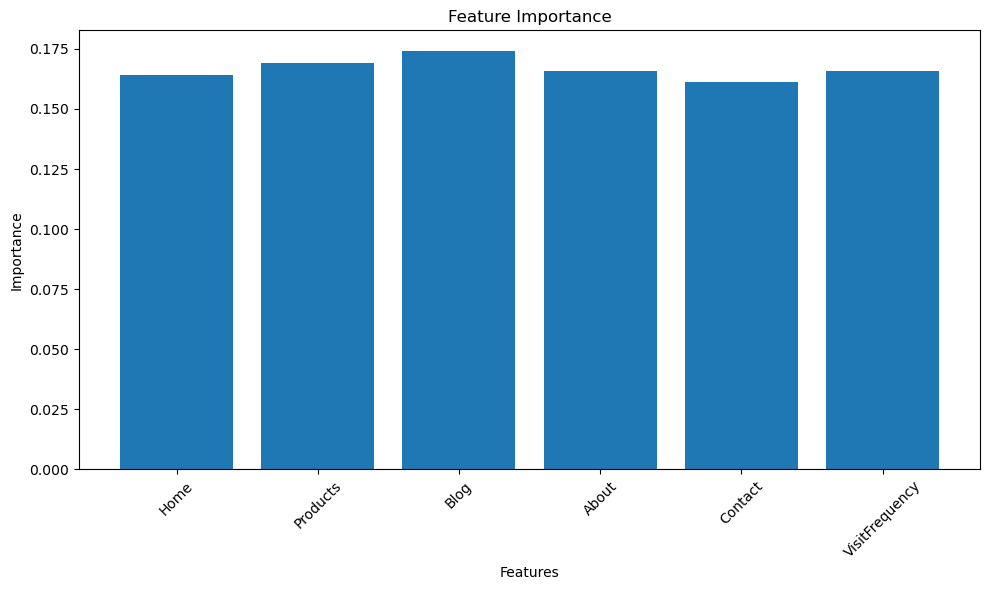

In [32]:
# Step 6: Calculating feature importance
feature_importance = clf.feature_importances_

# Step 7: Generating a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Define the model and hyperparameters to be tuned
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [36]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best model with tuned hyperparameters
best_model = grid_search.best_estimator_

In [37]:
# Retrieve the best model with tuned hyperparameters
best_model = grid_search.best_estimator_


In [38]:
# Step 7: Evaluating the model
# Make predictions on the test data
y_pred = best_model.predict(X_test)

In [39]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Evaluation Metrics:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Evaluation Metrics:
Accuracy: 0.26
Precision: 0.25936171552279225
Recall: 0.26
F1-Score: 0.2559636893250634


In [42]:
# Step 8: Calculate evaluation metrics
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print('Evaluation Metrics:')
print(report)


Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.24      0.33      0.28        42
           1       0.22      0.16      0.18        38
           2       0.30      0.34      0.32        41
           3       0.29      0.24      0.26        29
           4       0.26      0.22      0.24        50

    accuracy                           0.26       200
   macro avg       0.26      0.26      0.26       200
weighted avg       0.26      0.26      0.26       200



Text(0.5, 1.0, 'Random Forest confusion matrix')

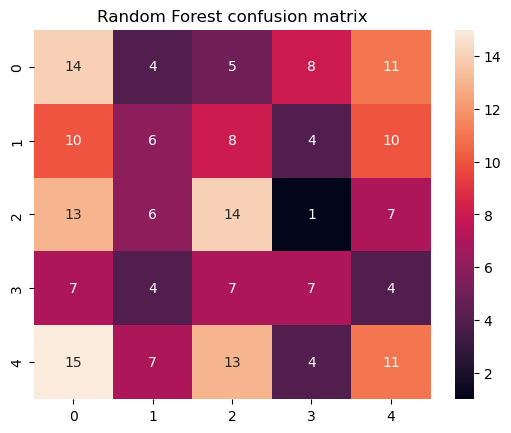

In [51]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Random Forest confusion matrix')

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
# Step 1: Importing the dataset
data = pd.read_csv('customer_data.csv')
# Step 2: Specifying the problem scope
X = data.drop(['CustomerID', 'Category'], axis=1)

In [45]:
# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [46]:
# Step 4: Apply the K-means clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [47]:
# Step 6: Analyze the clusters
cluster_df = pd.DataFrame({'CustomerID': data['CustomerID'], 'Cluster': clusters})

# Step 7: Print the cluster assignments
print(cluster_df)

     CustomerID  Cluster
0             1        0
1             2        4
2             3        1
3             4        2
4             5        3
..          ...      ...
995         996        1
996         997        4
997         998        4
998         999        2
999        1000        4

[1000 rows x 2 columns]


In [48]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
# Step 7: Calculate evaluation metrics
silhouette = silhouette_score(X_scaled, clusters)
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
davies_bouldin = davies_bouldin_score(X_scaled, clusters)

# Step 8: Print the evaluation metrics
print('Evaluation Metrics:')
print('Silhouette Score:', silhouette)
print('Calinski-Harabasz Index:', calinski_harabasz)
print('Davies-Bouldin Index:', davies_bouldin)


Evaluation Metrics:
Silhouette Score: 0.1247273715235876
Calinski-Harabasz Index: 119.84835524566272
Davies-Bouldin Index: 1.8319984453825473


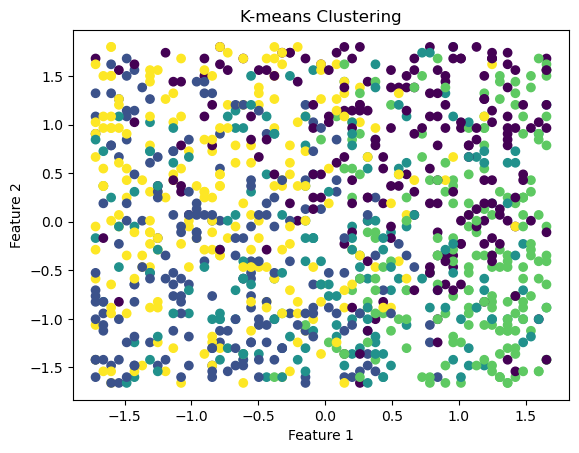

In [49]:
import matplotlib.pyplot as plt

# Step 7: Visualize the clustering results
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


In [53]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Step 2: Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Step 3: Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Step 4: Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Step 5: Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Step 6: Print the evaluation metrics
print('Evaluation Metrics:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


Evaluation Metrics:
Accuracy: 0.225
Precision: 0.2308424908424908
Recall: 0.225
F1-Score: 0.21889383896154535


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


# Step 2: Create a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 3: Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Step 4: Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Step 5: Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Step 6: Print the evaluation metrics
print('Evaluation Metrics:')
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)


Evaluation Metrics:
Mean Squared Error: 2.3292535
Mean Absolute Error: 1.3198500000000002
